In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from collections import defaultdict
from nltk.corpus import stopwords
import numpy as np

In [2]:
font = {'family' : 'sans-serif',
        'sans-serif' : 'Arial',
        'size'   : 14}
matplotlib.rc('font', **font)

In [3]:
lightblue = "#1d8db0"
darkblue = "#004070"

In [4]:
font_path = "/Library/Fonts/Arial.ttf"

In [5]:
save_plots = False

In [6]:
def show_cloud(cloud, title=None, save=False, file_name="cloud.png"):
    plt.figure(figsize=(20,10))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    if save:
        plt.savefig(file_name, bbox_inches='tight', format="PNG", transparent=True)
    plt.show()

In [7]:
def show_bar_chart(y, labels, title=None, save=False, file_name="bar.png", cmap=None):
    x = range(len(labels))
    color = cmap if cmap else "b"
    plt.figure()#figsize=(5,5))
    bar = plt.bar(x, y, color=color)
    plt.xticks(x, labels, rotation='vertical')
    plt.box(False)
    # remove all x axis tick lines
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True) # labels along the bottom edge are off
    plt.gca().axes.get_yaxis().set_visible(False)
    for rect in bar:
        height = rect.get_height()
        plt.text(
            rect.get_x() + rect.get_width()/2.0, 
            height, 
            '%d' % int(height), 
            ha='center', 
            va='bottom', 
            size=14)
        plt.title(title)
    if save:
        plt.savefig(image_path.format(group), bbox_inches='tight', format="PNG", transparent=True)
    plt.show()

In [8]:
def show_comparison_bar_chart(group_1_dict, group_2_dict):
    fig, ax = plt.subplots(figsize=(10,4))
    width = 0.45 
    
    #sort the dictionary keys alphabetically by driver and unpack into seperate sortd drivers and scores lists
    drivers, scores = zip(*sorted(group_1_dict.items()))
    x = np.arange(len(drivers))
    bar_1 = ax.bar(x, scores, width, color=lightblue, label=group_1_label)

    #sort the dictionary keys alphabetically by driver and unpack into seperate sortd drivers and scores lists
    drivers, scores = zip(*sorted(group_2_dict.items()))
    bar_2 = ax.bar(x + width, scores, width, color=darkblue, label=group_2_label)

    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(drivers, rotation='vertical')
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    # remove all x axis tick lines
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True) # labels along the bottom edge are off
    ax.get_yaxis().set_visible(False)
    for rect in bar_1+bar_2:
        height = rect.get_height()
        plt.text(
            rect.get_x() + rect.get_width()/2.0, 
            height,
            '%d' % int(height),
            ha='center', va='bottom',
            size=14)
    fig.legend(loc=1, frameon=False)
    if save_plots:
        plt.savefig("images/bar_both.png", bbox_inches='tight', format="PNG", transparent=True)
    plt.show()

In [9]:
with open("interviews.txt") as f:
    servey = f.read()

In [10]:
stopwords_en = set(stopwords.words('english'))

In [11]:
group_separator = "__NewGroup__\n"
interview_separator = "__NewInterview__\n"
question_separator = "__Question1d__\n"
drivers_separator = "__Drivers__\n"

In [12]:
total_drivers = 10

In [13]:
group_1_label = "group1"
group_2_label = "group2"
group_key = "group{:d}" #Must follow the same structure a s the group labels

In [14]:
scores_dict = {group_1_label:defaultdict(int), group_2_label:defaultdict(int)}

In [15]:
answers_dict = {group_1_label:defaultdict(int), group_2_label:defaultdict(int)}

In [16]:
groups = servey.split(group_separator)

In [17]:
for group_number, group in enumerate(groups):
    interviews = group.split(interview_separator)
    for interview_number, interview in enumerate(interviews):
        answer, drivers = interview.split(drivers_separator)
        drivers = drivers.strip("\n").split("\n")
        # split interview title and question 1 d
        group, answer = answer.split(question_separator)
        # remove leading and trailing newlines before splitting the text into individual anwers
        answer = answer.strip("\n").split("\n")
        
        # count the phrases in the answers
        for phrase in answer:
            answers_dict[group_key.format(group_number+1)][phrase.lower().strip()] += 1
        
        # calculate the score for the drivers
        for priority, driver in enumerate(drivers):
            # some drivers have the same prioroty
            labels = driver.split("/") 
            for label in labels:
                score = total_drivers-priority
                scores_dict[group_key.format(group_number+1)][label.lower().strip()] += score
            

# Word Clouds

In [18]:
# shared Word Cloud Settings
background="White" #none for transparent
mode = "RGBA"
width = 1000
height = 500
collocations = False
min_font_size=4
prefer_horizontal=1
relative_scaling=1

In [19]:
mask = np.array(Image.open("cloud-mask.png"))

## Driver Word Clouds

In [20]:
driver_cloud = WordCloud(
    colormap="bone",
    random_state=25,
    mask=mask,
    background_color=background, 
    mode=mode, 
    collocations=collocations,
    min_font_size=min_font_size,
    prefer_horizontal=prefer_horizontal,
    relative_scaling=relative_scaling,
    stopwords=stopwords_en,
    font_path=font_path
)

In [21]:
image_path = "images/driver_{:s}.png"

group1


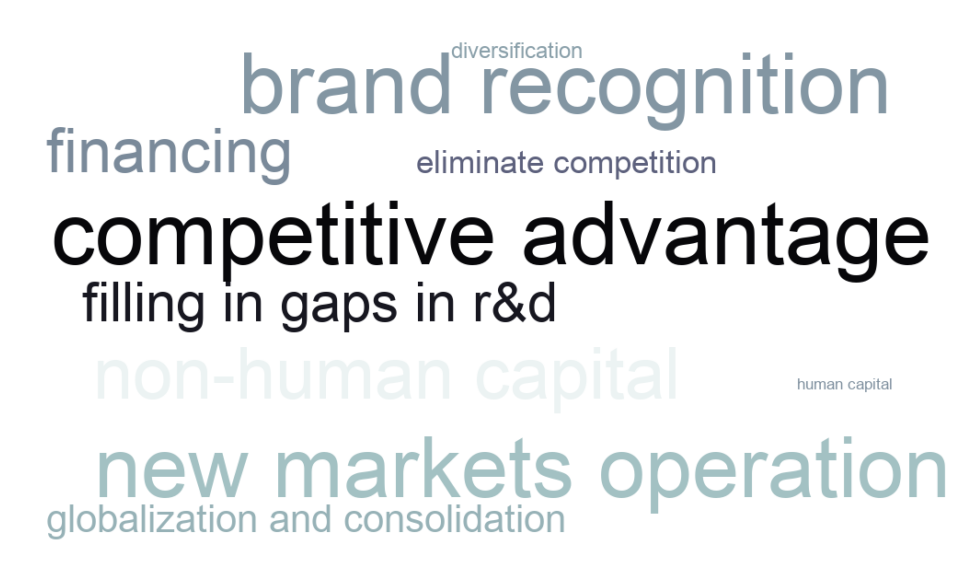

group2


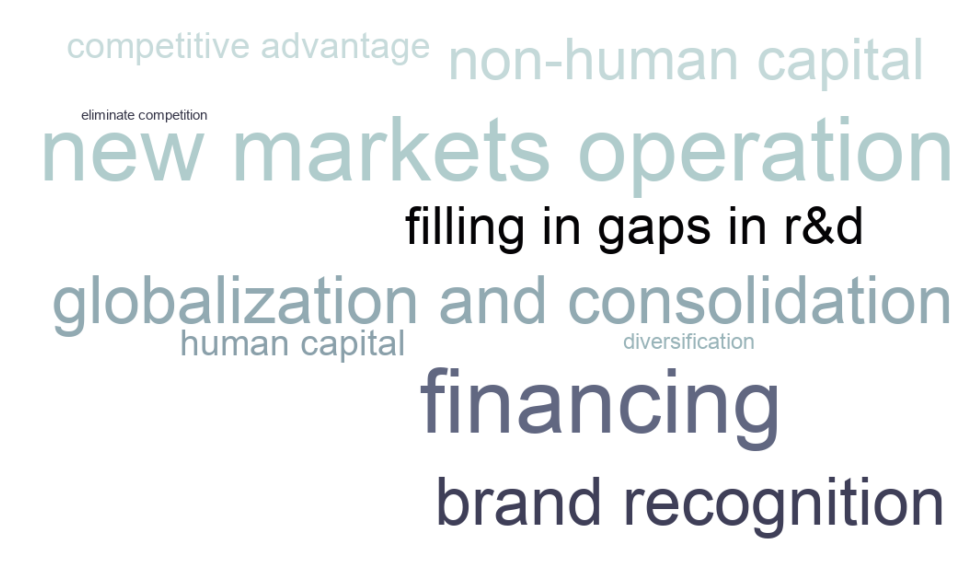

In [22]:
for group, scores in scores_dict.items():
    driver_cloud.generate_from_frequencies(scores)
    print(group)
    show_cloud(driver_cloud, save=save_plots, file_name=image_path.format(group))

## Question Word Clouds

In [27]:
question_cloud = WordCloud(
    colormap="bone",
    random_state=25,
    mask=mask,
    background_color=background, 
    mode=mode, 
    collocations=collocations,
    min_font_size=min_font_size,
    prefer_horizontal=prefer_horizontal,
    relative_scaling=relative_scaling,
    stopwords=stopwords_en,
    font_path=font_path
)

In [28]:
image_path = "images/question_{:s}.png"

group1


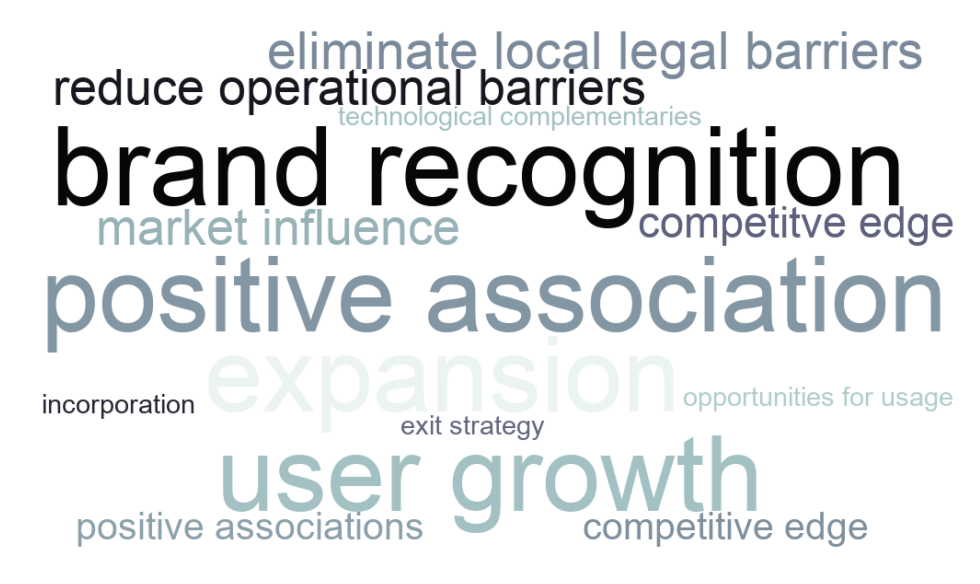

group2


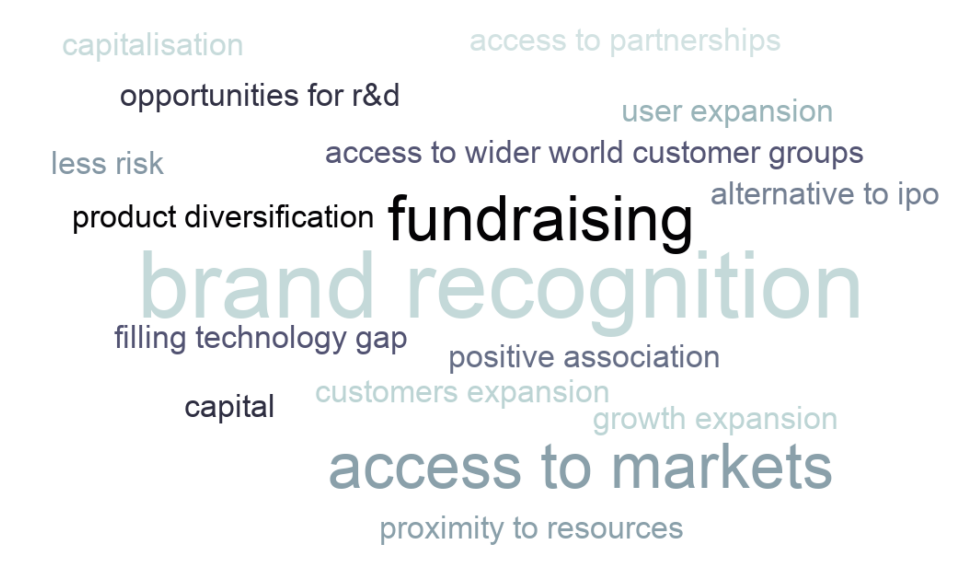

In [29]:
for group, answers in answers_dict.items():
    question_cloud.generate_from_frequencies(answers)
    print(group)
    show_cloud(question_cloud, save=save_plots, file_name=image_path.format(group))

## Driver Graphs

In [30]:
image_path = "images/bar_{:s}.png"

group1


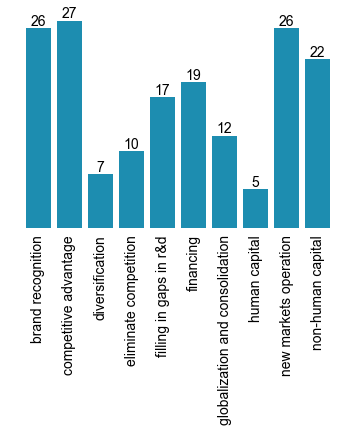

group2


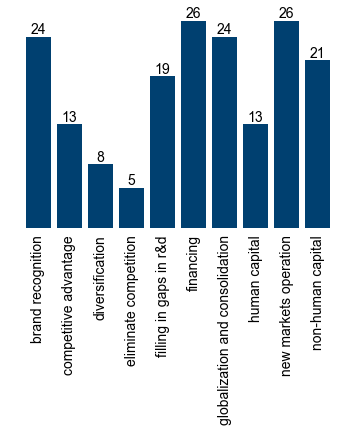

In [31]:
for group, score in scores_dict.items():
    drivers, scores = zip(*sorted(scores_dict[group].items()))
    print(group)
    color = lightblue if group is group_1_label else darkblue
    show_bar_chart(scores, drivers, save=save_plots, file_name=image_path.format(group), cmap=color)

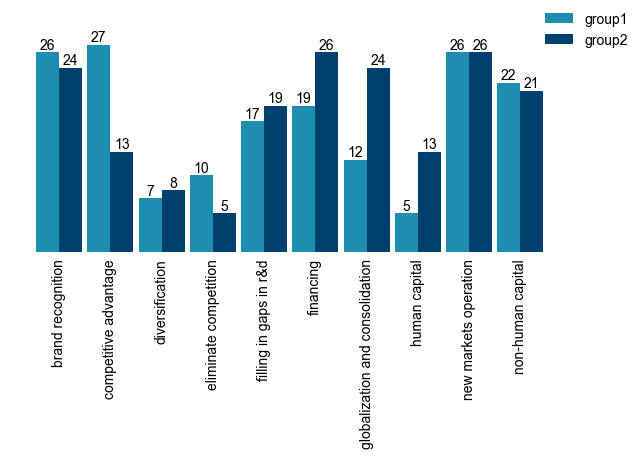

In [32]:
show_comparison_bar_chart(scores_dict[group_1_label], scores_dict[group_2_label])